Successfully loaded file: '../data/raw/S01R01.txt'
First 5 rows of data:
   Time  Trunk_Accel_X  Trunk_Accel_Y  Trunk_Accel_Z  Thigh_Accel_X  \
0    15             70             39           -970              0   
1    31             70             39           -970              0   
2    46             60             49           -960              0   
3    62             60             49           -960              0   
4    78             50             39           -960              0   

   Thigh_Accel_Y  Thigh_Accel_Z  Ankle_Accel_X  Ankle_Accel_Y  Ankle_Accel_Z  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   Label  
0      0

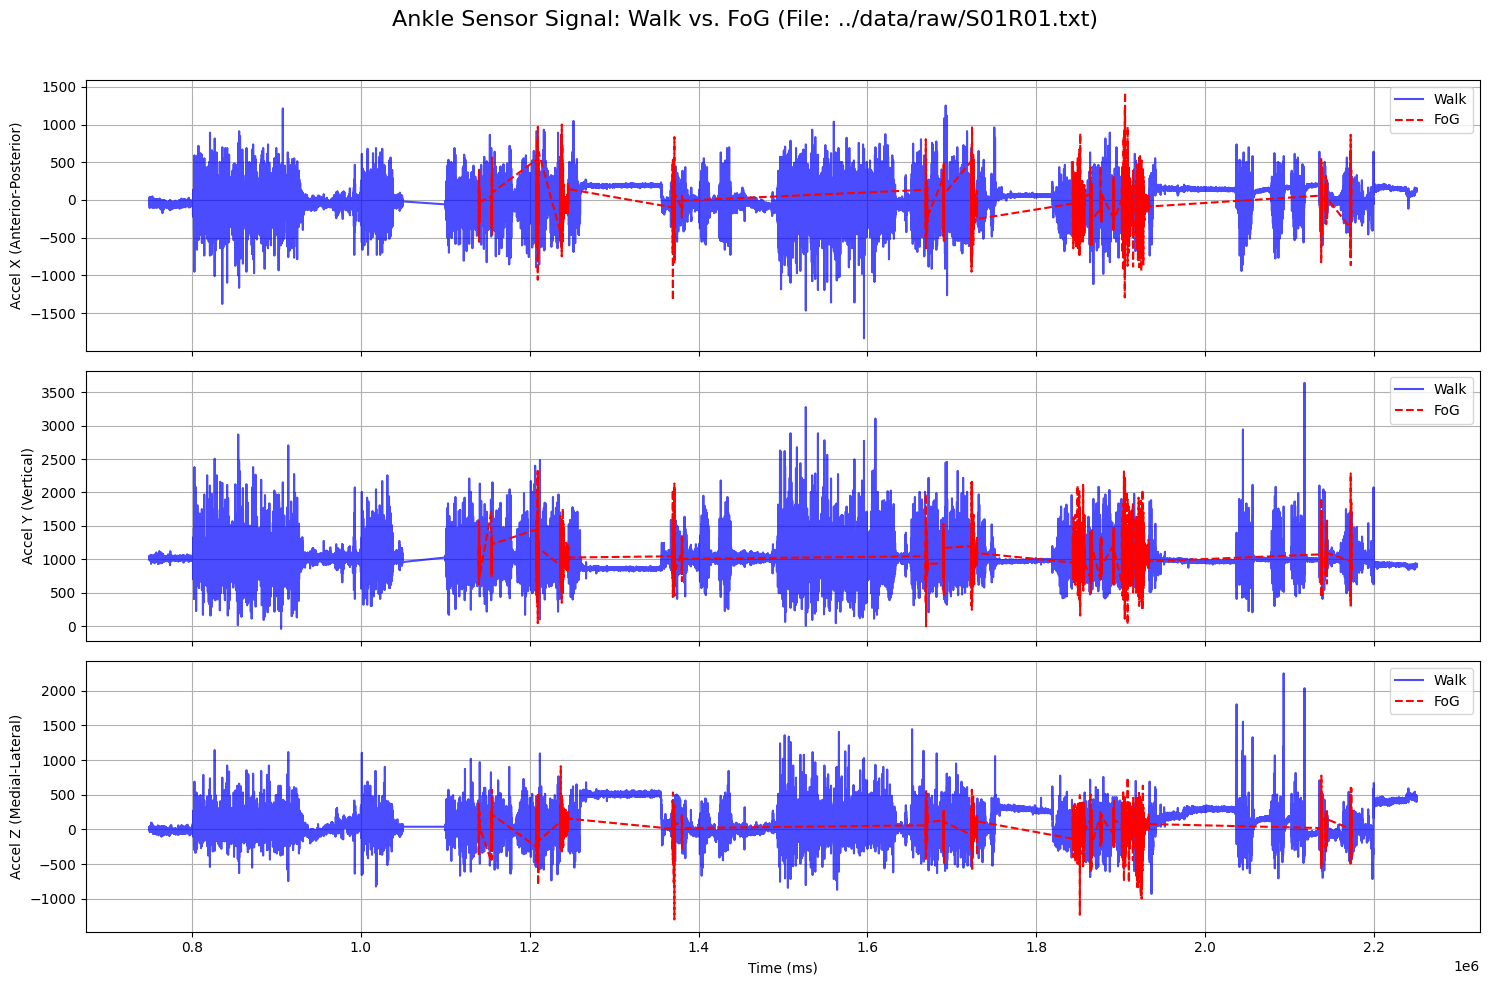

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. CONFIGURATION ---
# Path from notebook to raw data file
# ../ moves up one directory level
file_path = '../data/raw/S01R01.txt'

# Define column names for clarity
column_names = [
    'Time',
    'Trunk_Accel_X', 'Trunk_Accel_Y', 'Trunk_Accel_Z',
    'Thigh_Accel_X', 'Thigh_Accel_Y', 'Thigh_Accel_Z',
    'Ankle_Accel_X', 'Ankle_Accel_Y', 'Ankle_Accel_Z',
    'Label'
]

# --- 2. DATA LOADING ---
try:
    # Read space-separated txt file into pandas DataFrame
    df = pd.read_csv(file_path, sep=' ', header=None, names=column_names)
    print(f"Successfully loaded file: '{file_path}'")
    print("First 5 rows of data:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Ensure data is in 'data/raw/'.")
    # Stop execution if file not found
    exit()

# --- 3. VISUALIZATION ---
# Select only ankle sensor data for plotting
df_ankle = df[['Time', 'Ankle_Accel_X', 'Ankle_Accel_Y', 'Ankle_Accel_Z', 'Label']]

# Filter data for FoG (Label == 2) and Normal Walk (Label == 1)
fog_events = df_ankle[df_ankle['Label'] == 2]
walk_events = df_ankle[df_ankle['Label'] == 1]

print(f"\nFile Analysis:")
print(f"- Found {len(fog_events)} FoG data points (Label=2).")
print(f"- Found {len(walk_events)} Normal Walk data points (Label=1).")

# Plotting setup
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
fig.suptitle(f'Ankle Sensor Signal: Walk vs. FoG (File: {file_path})', fontsize=16)

# Plot X-axis acceleration
axes[0].plot(walk_events['Time'], walk_events['Ankle_Accel_X'], label='Walk', color='blue', alpha=0.7)
axes[0].plot(fog_events['Time'], fog_events['Ankle_Accel_X'], label='FoG', color='red', linestyle='--')
axes[0].set_ylabel('Accel X (Anterior-Posterior)')
axes[0].legend()
axes[0].grid(True)

# Plot Y-axis acceleration
axes[1].plot(walk_events['Time'], walk_events['Ankle_Accel_Y'], label='Walk', color='blue', alpha=0.7)
axes[1].plot(fog_events['Time'], fog_events['Ankle_Accel_Y'], label='FoG', color='red', linestyle='--')
axes[1].set_ylabel('Accel Y (Vertical)')
axes[1].legend()
axes[1].grid(True)

# Plot Z-axis acceleration
axes[2].plot(walk_events['Time'], walk_events['Ankle_Accel_Z'], label='Walk', color='blue', alpha=0.7)
axes[2].plot(fog_events['Time'], fog_events['Ankle_Accel_Z'], label='FoG', color='red', linestyle='--')
axes[2].set_ylabel('Accel Z (Medial-Lateral)')
axes[2].set_xlabel('Time (ms)')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()